# Laboratorium przetwarzania obrazów i grafiki komputerowej

## Sesja 2 - Jasność, kontrast obrazu. Histogram. Konwersja między typami danych

### Łódź 2017

#### Marek Kociński

### Zadania do wykonania

#### 1. Obrazy do pracy podczas laboratrium

Ze [strony domowej przedmiotu](http://www.eletel.p.lodz.pl/med/pl/index.php?option=com_jotloader&view=categories&cid=99_b3c1de9aa6c8258566cc1b3370d1e750&Itemid=346) pobierz plik *lab2.zip*. Plik zapisz **w swoim katalogu roboczym** na dysku *D:\ *, a następnie rozpakuj. Użyj programu *7zip* lub polecenia systemowego *Wyodrębnij wszystkie...*.

#### 2. Importowanie bibliotek systemowych

Zaimportuj wszystkie pakiety systemowe, które będą wykorzystywane podczas wykonywania ćwiczenia.

In [1]:
import os
import numpy as np
import scipy.misc as misc
import matplotlib.pyplot as plt

#### 3. Wybór metody wyświetlania obrazów

Podczas wykonywania ćwiczenia sugerowane jest wyświetlanie wyników **w oknach zewnętrznych**.

In [2]:
# wyświetlanie w osobnym, niezależnym oknie
#%matplotlib qt
# wyświetlanie wewnątrz dokumentu
%matplotlib inline

#### 4. Importowanie bibliotek własnych

Jeżeli korzystasz z własnych modułów lub pakietów również trzeba ja dołączyć.

Do ponownego zaimportowania modułu nie wystarczy ponowne użycie słowa kluczowego *import* wraz z nazwą modułu. Trzeba "wymusić" ponowne załadowanie klas, funkcji, zmiennych zdefionowanych w utworzonej wcześniej bibliotece za pomocą runkcji *reload()*.

Uwaga! Moduły *poigk_lab1.py* oraz *poigk_lab2.py* zostały napisane przez prowadzącego zajęcia i nie są dostępne na komputerach Studenckich. W trackie zajęć można zapisać tworzone funkcje we własnych modlułach w celu ich późniejszego, wielokrotnego wykorzystania. Nie należy importować pakietu *poigk_lab1* i *poigk_lab2*  podczas pracy na laboratoriach.

In [3]:
import poigk_lab1 as poigk1
import poigk_lab2 as poigk2

#### 5. Wczytanie i wyświetlenie obrazu z pliku dyskowego

Wczytaj jeden z obrazów dostępnych w katalogu z danymi (np. *w2.png*). W tym celu użyj funkcji *imread()* z biblioteki *matplotlib.pyplot*. Zamień obraz na monochromatyczny. Wykorzystaj funkcję napisaną podczas poprzednich zajęć *rgb2mono()* lub operacje macierzowe.

In [4]:
# pliki z obrazami RGB dostępne w katalogu z danymi do laboratorium nr 2 (lab2_dane)

# c1.png, j1.png, j2.png, j3.png, p1.png, p2.png,
# pom1.png, pom2.png, w1.png, w2.png, wo2.png, wo3.png, wo4.png

filename = 'w2'
filenameext = filename + '.png'
pathtofile = os.path.join('lab2_dane',filenameext)
im_rgb = plt.imread(pathtofile)
im_mono = poigk1.rgb2mono(im_rgb)

Wyświetl podstawowe informacje o obu obrazach (użyj funkcji *imginfo()*).

- Zwróć uwagę jakiego typu są elemetny obrazu (macierzy)? 
- Jaki jest przedział jasnośći?
- Jaka jest wartość średnia jasności obrazu?

Wyświetl obrazy w oknie na zwnątrz dokumentu.

In [5]:
poigk1.imginfo(im_rgb, 'Warzywa-rgb')
poigk1.imginfo(im_mono, 'Warzywa-mono')

info o WARZYWA-RGB: min=0.00, aver=0.22,  max=1.00, shape=(754, 434, 3), dtype=float32
info o WARZYWA-MONO: min=0.00, aver=0.23,  max=0.88, shape=(754, 434), dtype=float32


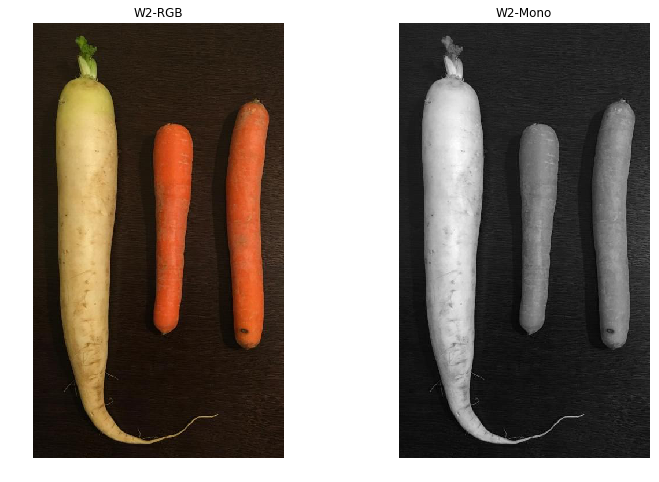

In [6]:
poigk1.imshow2([im_rgb, im_mono],titles=['W2-RGB', 'W2-Mono'],show_axis='off')

#### 6. Jasność i kontrast obrazu

Napisz funkcję, która bada jasność i kontrast obrazu w skali szarości. W tym celu możesz zastosować konwencję macierzową lub użyć dwóch pętli *for*. Wzory definicyjne obu parametrów obrazu znajdziesz w wykładach ([wykład1](http://eletel.p.lodz.pl/pstrumil/po/poprawa%20jakosci%201.pdf), [wykład2](http://eletel.p.lodz.pl/pstrumil/ang_po/enhancement1.pdf)). 

Zastanów się jakim parametrom statystycznym odpowiadają obie wielkości obliczone według tak przyjętych definicji?

Oblicz i wypisz obydwa parametry obrazu zapisanego w zmiennej *im_mono*.

Zmodyfikuj funkcję *imginfo()* z poprzednich zajęć tak, aby wypisywała dodatkowo informację o kontraście. Inormacja o jasności była wypisywana w tej funkcji, ale była inaczej nazywana. Zastosuj gotową metodę wyliczania dostępną w bibliotece *numpy*. Zapisz nową funkcję jako *imginfo2()*.

In [7]:
poigk2.brigh_cont_for_loops(im_mono, 'warzywa-mono')

info o WARZYWA-MONO: brightness=0.227, contrast=0.213


In [8]:
poigk2.imginfo2(im_mono, 'warzywa-mono')

info o WARZYWA-MONO: min=0.00, max=0.88, br.=0.227, con.=0.213 shape=(754, 434), dtype=float32


#### 7. Histogram obrazu

Napisz funkcję, która jednocześnie rysuje obraz i jego histogram. W tym celu zmodyfikuj napisaną funkcję *imshow2()*. Definicję histogramu znajdziesz w dalszej części wykładu dotyczącego jasności i kontrastu oraz np. na stronach Wikipedii ([wiki](https://en.wikipedia.org/wiki/Image_histogram)). Do narysowania histogramu zastosuj funkcję *plt.hist()*. Zapoznaj się ze sposobem użycia tej funkcji. Sprawdź jakiego typu są argumenty wejściowe oraz co jest obliczane i zwracane z funkcji. Zwróć uwagę na fakt, iż funkcja *plt.hist()* wylicza histogram z macierzy wektorowej (1D); aby obraz (macierz 2D) zamienić na macierz wektor zastosuj metodę *ravel()* na danym obrazie.

Sprawdź wygląd histogramu obrazu *im_mono* dla różnej liczby przedziałów jasności (*bins*): 8, 16, 32, 64, 128, 256. Zinterpretuj różnice w wyglądzie histogramu dla różnej wartości tego argumetnu. Zwróć uwagę na liczność poszczególnych przedziałów jasności (wartości na osi *y*).

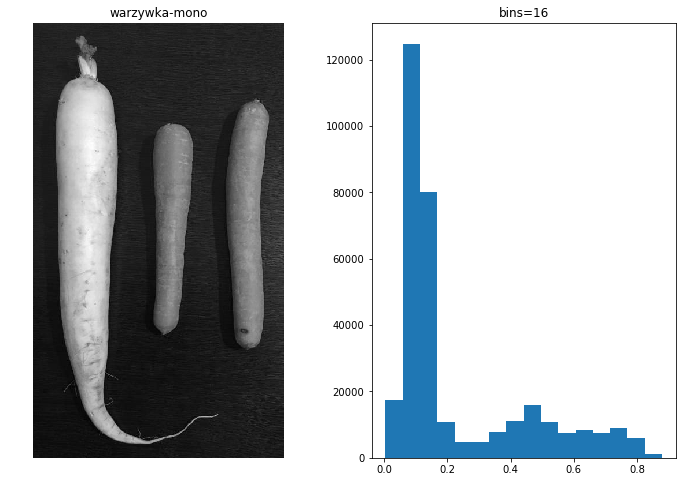

In [9]:
poigk2.img_hist(im_mono,title='warzywka-mono',show_axis='off',bins=16)

**UWAGA!!!** funkcja *hist4()* jest funkcją napisaną przez prowadzącego. Definicja i ciało funkcji znajdują się  w module o nazwie *poigk_lab2*. Możesz napisać taką funkcję przez zmodyfikowanie funkcji *imshow4()*.

False


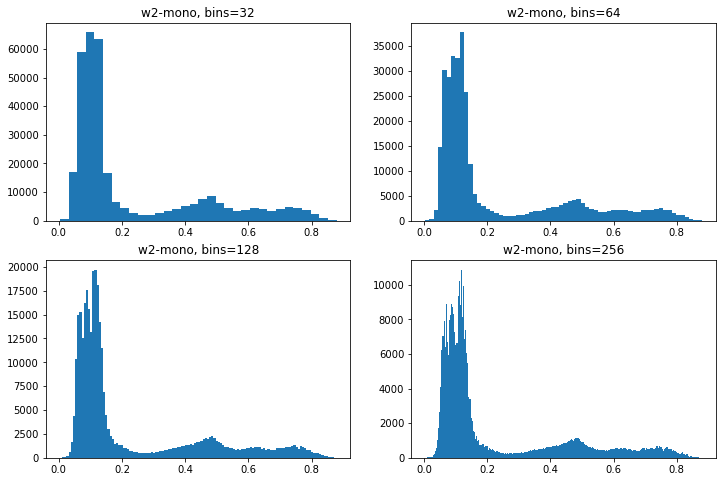

In [10]:
poigk2.hist4([im_mono,im_mono,im_mono,im_mono],titles=['w2-mono','w2-mono','w2-mono','w2-mono'], share_axes=False)

#### 8. Zamiana typu elementów obrazu

Zamień obraz *im_mono* z typu *float32* na typ *uint8*.

Aby zamienić typ elemetnów macierzy (obrazu) na inny typ  możemy zastosować jedną z funkcji:
1. np.asarray() - funkcja *wydajna*; nie towrzy kopii macierzy wejściowej jeśli typ macierzy wyjściowej jest ten sam,
1. np.astype() - funkcja *bezpieczna*; zawsze zwraca kopię macierzy.

Wyświetl obraz wynikowy po przeprowadzeniu zmiany typu elementów (z elementami typu *uint8*).

In [11]:
im_uint8 = np.asarray(im_mono,dtype=np.uint8)

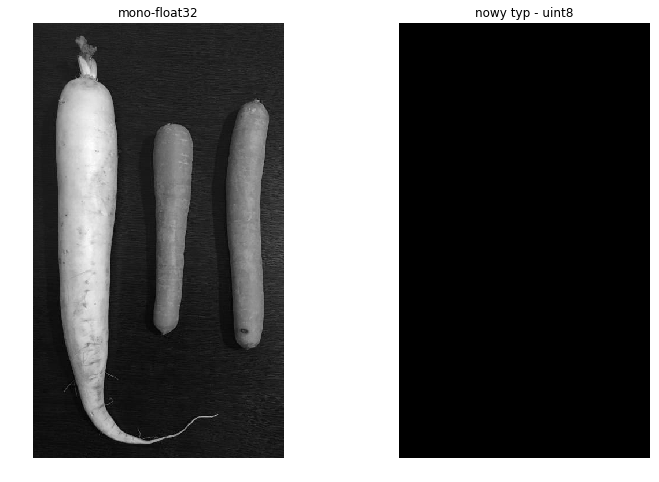

In [12]:
# Wyświetlenie obu obrazów.
poigk1.imshow2([im_mono,im_uint8],show_axis='off',titles=['mono-float32','nowy typ - uint8'])

Czy obraz wyświetla się poprawnie? Dlaczeg obarz po konwersji jest cały "czarny"? 

Aby łatwiej zinterpretować wynik wyświetl informacje o obu obrazach. 

Wyjaśnij co jest tego przyczyną. Zaproponuj rozwiązanie zaistniałej sytuacji.

In [13]:
poigk2.imginfo2(im_mono, 'mono-float32')
poigk2.imginfo2(im_uint8, 'mono-uint8')

info o MONO-FLOAT32: min=0.00, max=0.88, br.=0.227, con.=0.213 shape=(754, 434), dtype=float32
info o MONO-UINT8: min=0.00, max=0.00, br.=0.000, con.=0.000 shape=(754, 434), dtype=uint8


#### 9. Zmiana jasności obrazu

Popraw procedurę konwersji pomiędzy typami obrazów poprzez odpowiednią zmianę zakresów jasności i przeskalowanie wszystkich elementów obrazu. Abu uzyskać oczekiwany efekt zastosuj następującą relację pomiędzy wartością pikseli w obrazie wynikowym (*outputPixel*) a obrazie wejściowym (*inputPixel*):

$outputPixel = (inputPixel - inpMin) * \frac{(outMax-outMin)}{(inpMax-inpMin)} + outMin$

gdzie:

* inpMin, inpMax - minimalna i maksymalna wartość jasności w obrazie wejściowym
* outMin, outMax - minimalna i maksymalna wartość jasności w obrazie wynikowym
 
Aby konwersja obrazów, w przyszłości, była łatwiejsza napisz odpowiednią funkcję w dwóch wersjach: stosując operacje na macierzach oraz z wykorzystaniem dwóch pętli *for*.

Przed zamianą typu macierzy z *float32* na *uint8* zmień zakres jasności obrazu z zakresu $0\div1$ na $0\div255$.

Ponownie wyświetl obydwa obrazy i wypisz informacje o nich.

In [14]:
poigk2.rescaleFor(im_mono, outMin=0, outMax=255)
im_uint8_rescaled = np.asarray(im_mono,dtype=np.uint8)

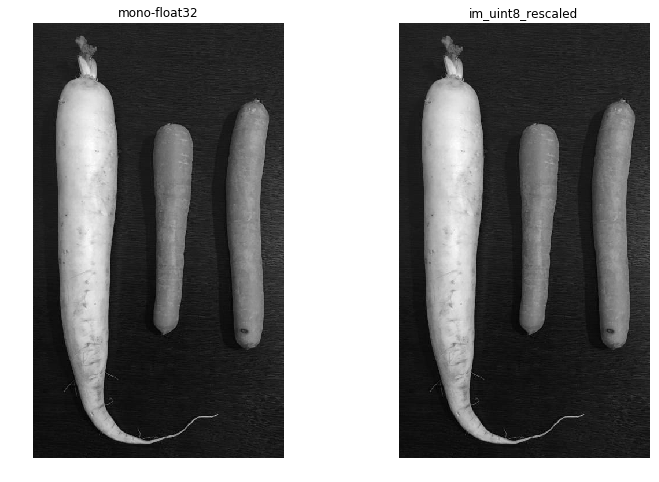

In [15]:
# Wyświetlenie obu obrazów.
poigk1.imshow2([im_mono,im_uint8_rescaled],show_axis='off',titles=['mono-float32','im_uint8_rescaled'])

In [16]:
# informacje o obrazach
poigk2.imginfo2(im_mono, 'mono-float32')
poigk2.imginfo2(im_uint8_rescaled, 'im_uint8_rescaled')

info o MONO-FLOAT32: min=0.00, max=255.00, br.=65.171, con.=62.135 shape=(754, 434), dtype=float32
info o IM_UINT8_RESCALED: min=0.00, max=255.00, br.=64.674, con.=62.137 shape=(754, 434), dtype=uint8


Zaróć uwagę na fakt, iż napisana funkcja *rescaleFor()* nie musi zawierć słowa kuczowego *return*. Dlaczego mimo to zakres jasności obrazu *im_mono* został zmieniony? Napisz funkcję *rescale()* która wykorzystuje operacje macierzowe do zamiany zakresów jasności. Czy funkcja *rescale()* również nie musi zwracać macierzy wynikowej? Zastosuj znaną funkcję *np.asarray()* która zamieni typ danych na porządany (typ danych macierzy wynikowej może być przekazywany do funkcji jako argument).

#### 10. Porównanie szybkości działania funkcji *rescaleFor()* i *rescale()*

Porównaj szybkość działania funkcji które zamieniają typy elementów w obrazie. 

Ponieważ funkcja *rescaleFor()* odpowiada tylko za zmianę wartości minimalnej i maksymalnej w obrazie, dlatego konieczne jest dodatkowe przeprowadzenie konwersji typów danych (*np.asarray()*). Funkcja *rescale()* zamienia zakres jasności i zwaraca macierz wynikową wypełnianą elementami (pikselami) w nowym typie danych. 

Zastosuj funkcje *magiczne* z języka IPython : *%timeit* dla sprawdzenia szybkości działania pojedyńczej funkcji i *%%timeit* dla określenia czasu wykonywania całej komórki.

Aby obie funkcje przeprowadziły obliczenia dla takich samych obrazów, tworzymy dwie kopie (*im1* i *im2*) obrazu *im_mono*.

In [17]:
im1 = im_mono.copy()
im2 = im_mono.copy()

In [18]:
%%timeit 
poigk2.rescaleFor(im1, outMin=0, outMax=255)
im_uint8_rescaled = np.asarray(im_mono,dtype=np.uint8)

1 loop, best of 3: 1.07 s per loop


In [19]:
%timeit poigk2.rescale(im2,outMin=0, outMax=255,dtype='uint8')

1000 loops, best of 3: 694 µs per loop


#### 11. Zmiana jasności obrazu typu float - dodawanie stałej wartości

Do obrazu wczytanego i przekonwertowanego do skali szarości (*im_mono*, typ *float32*) dodaj kilka razy wartość stałą wartość np. $0.5$. Za każdym razem wypisz informacje o obrazie, a także go wyświetl.

Jakie zmiany zaobserowałeś/zaobserowałaś? Wyjaśnij to. Dlaczego nie zmienia się jasność obrazu pomimo że zmieniają się parametry statystyczne (wartości minimalna, średnia i maksymalna) w każdym przebiegu pętli for? Wyjaśnij zmiany zaobserwowane w kształcie histogramów kolejnych obrazów.

In [20]:
# dla pewności że obraz nie został zmieniony podczas wykonywanie poprzednich zadań ponownie go wczytujemy
filename = 'w2'
filenameext = filename + '.png'
pathtofile = os.path.join('lab2_dane',filenameext)
im_rgb = plt.imread(pathtofile)
im_mono = poigk1.rgb2mono(im_rgb)

In [21]:
poigk2.imginfo2(im_mono, 'im_mono')

info o IM_MONO: min=0.00, max=0.88, br.=0.227, con.=0.213 shape=(754, 434), dtype=float32


info o IM_MONO+0.3: min=0.30, max=1.18, br.=0.527, con.=0.213 shape=(754, 434), dtype=float32
info o IM_MONO+0.6: min=0.60, max=1.48, br.=0.827, con.=0.213 shape=(754, 434), dtype=float32
info o IM_MONO+0.9: min=0.90, max=1.78, br.=1.127, con.=0.213 shape=(754, 434), dtype=float32


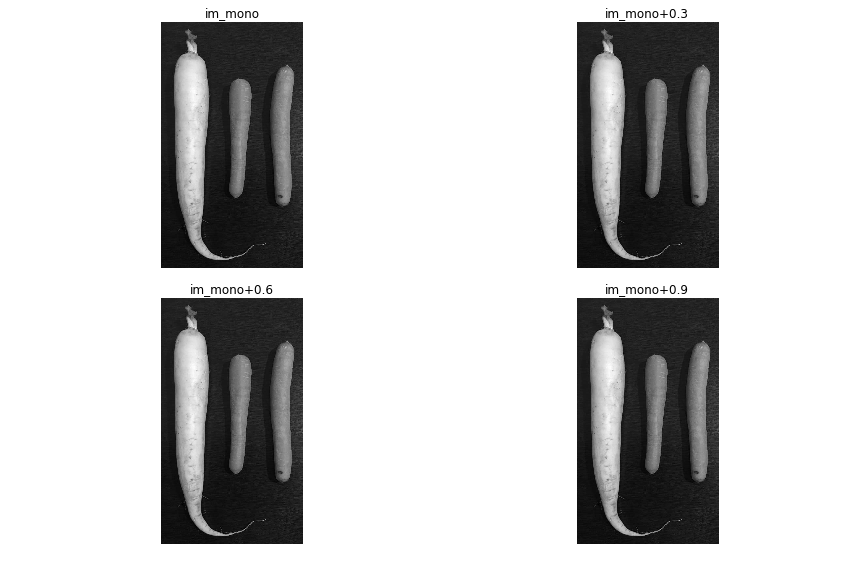

In [22]:
imgs = [im_mono.copy()]
titles = ['im_mono']
val_to_add = 0.3
for i in range(1,4):
    im_mono += val_to_add
    imgs.append(im_mono.copy())
    tit = 'im_mono+' + str(i * val_to_add)
    titles.append(tit)
    poigk2.imginfo2(im_mono, titles[i])
poigk1.imshow4(imgs,show_axis='off',titles=titles)

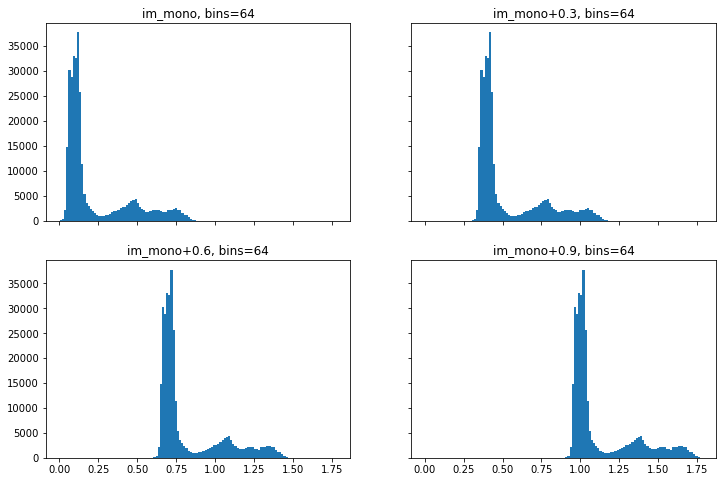

In [23]:
poigk2.hist4(imgs,titles=titles, share_axes='True', bins=[64,64,64,64])

In [24]:
reload(poigk2)

<module 'poigk_lab2' from 'poigk_lab2.pyc'>

#### 12. Zmiana jasności *wycinka* obrazu typu float - dodawanie stałej wartości

Do wycinka obrazu wczytanego i przekonwertowanego do skali szarości (*im_mono*, typ *float32*) dodaj kilka razy wartość stałą wartość np. $2.0$. Za każdym razem wypisz informacje o obrazie, a także go wyświetl.

Przypisz do zmiennej *b* fragment wczytanego obrazu. Wytnij kwadratowy/prostokątny fragment. W tym celu wykorzystaj metodę zawną *wycinaniem* (ang. *slicing*). Wyjaśnij dlaczego na kolejnych obrazach coraz gorzej widać obiekty? Dlaczego obraz wydaje się coraz ciemniejszy? Zwróć uwagę na parametry obrazu: wartości minimalną, średnią i maksymalną.

In [25]:
# dla pewności że obraz nie został zmieniony ponownie go wczytujemy
filename = 'w2'
filenameext = filename + '.png'
pathtofile = os.path.join('lab2_dane',filenameext)
im_rgb = plt.imread(pathtofile)
im_mono = poigk1.rgb2mono(im_rgb)

In [26]:
poigk2.imginfo2(im_mono, 'im_mono')

info o IM_MONO: min=0.00, max=0.88, br.=0.227, con.=0.213 shape=(754, 434), dtype=float32


info o IM_MONO+2.0: min=2.08, aver=2.13,  max=2.17, shape=(55, 30), dtype=float32
info o IM_MONO+4.0: min=4.08, aver=4.13,  max=4.17, shape=(55, 30), dtype=float32
info o IM_MONO+6.0: min=6.08, aver=6.13,  max=6.17, shape=(55, 30), dtype=float32


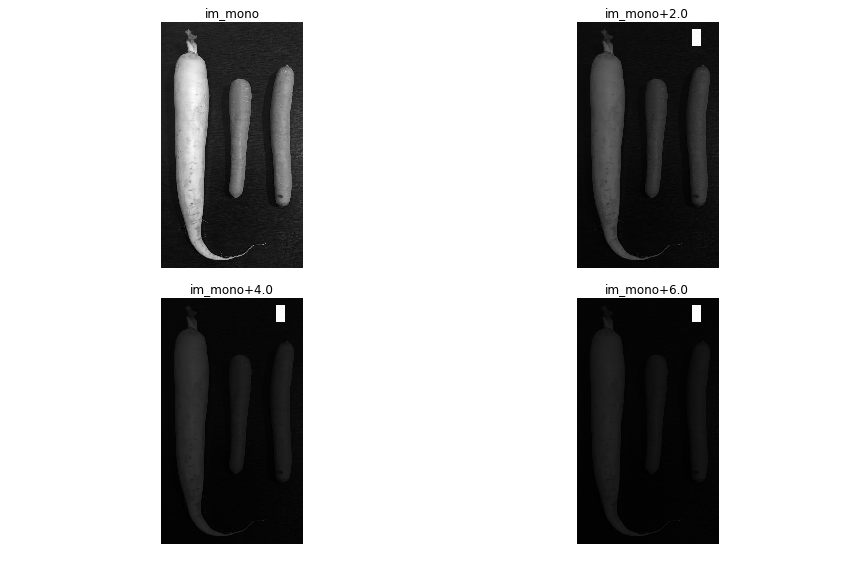

In [27]:
b = im_mono[20:75,350:380]
imgs = [im_mono.copy()]
titles = ['im_mono']
val_to_add = 2.0
for i in range(1,4):
    b += val_to_add
    imgs.append(im_mono.copy())
    tit = 'im_mono+' + str( i * val_to_add)
    titles.append(tit)
    poigk1.imginfo(b, titles[i])
poigk1.imshow4(imgs,show_axis='off',titles=titles)

#### 13. Zmiana jasności  obrazu typu uint8 - dodawanie stałej wartości

Wczytaj pnownie obraz *w2.png*, zamień go do skali szarości, przeskaluj do zakresu $0\div255$ i zamień typ na *uint8*. 

Do obrazu dodaj 4 razy stałą wartość np. 15. W tym celu możesz zastosować pętlę for.

Wyjaśnij dlaczego w pewnych obszarach obrazu pojawiają się  czarne piksele? Z czym to jest związane?

In [28]:
# dla pewności że obraz nie został zmieniony ponownie go wczytujemy
filename = 'w2'
filenameext = filename + '.png'
pathtofile = os.path.join('lab2_dane',filenameext)
im_rgb = plt.imread(pathtofile)

In [29]:
# zamiana na obraz monochromatyczny
im_mono = poigk1.rgb2mono(im_rgb)
# przeskalowanie do zarkresów 0-255, zamiana na typ "uint8"
im_mono=poigk2.rescale(im_mono,outMin=0,outMax=255)

In [30]:
poigk1.imginfo(im_mono)

info o OBRAZEK: min=0.00, aver=64.67,  max=255.00, shape=(754, 434), dtype=uint8


info o IM_MONO+15: min=0.00, aver=79.00,  max=255.00, shape=(754, 434), dtype=uint8
info o IM_MONO+30: min=0.00, aver=90.36,  max=255.00, shape=(754, 434), dtype=uint8
info o IM_MONO+45: min=0.00, aver=98.59,  max=255.00, shape=(754, 434), dtype=uint8


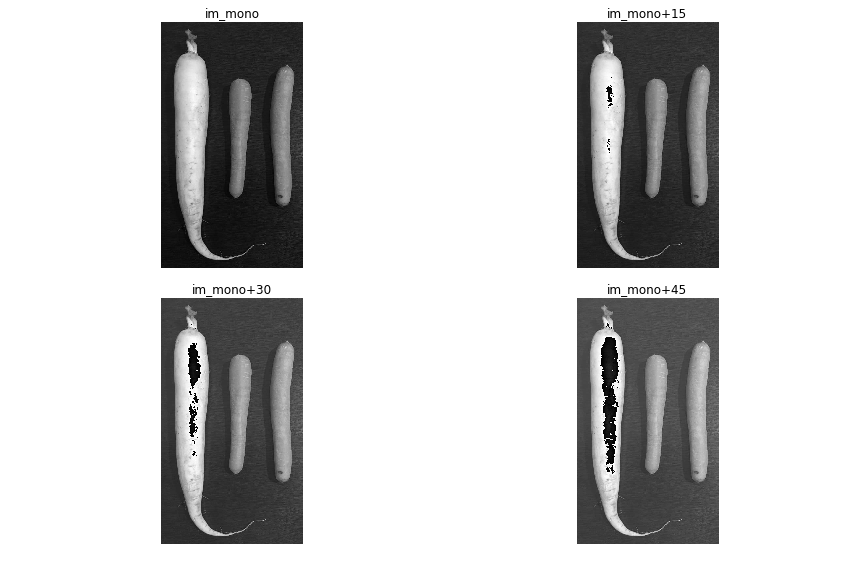

In [31]:
imgs = [im_mono.copy()]
titles = ['im_mono']
for i in range(1,4):
    im_mono += 15
    imgs.append(im_mono.copy())
    tit = 'im_mono+' + str(i * 15)
    titles.append(tit)
    poigk1.imginfo(im_mono, titles[i])
poigk1.imshow4(imgs,show_axis='off',titles=titles)

1. Jakie zmiany zaobserwowałaś/zaobserwowałeś w zadaniach $11\div13$?
1. Wyjaśnij dlaczego podczas dodawnia stałej wartośći do obrazów w przypadku obrazów *uint8* obserwujemy widoczne zmiany, a w obrazach *float32* tych zmian nie widzimy? 
    - Czy różnice w zachowaniu obrazów *float32* i *uint8* (zad. 11 i zad. 13) mają wspólne źródło? Czy są to dwia różne zagadnienia?
    - Czy  w zad. 11 jasność obrazów *float32* nie zmienia się? Wypisana informacja o wartości średniej wskazuje że jasność pikseli ulega zmiania. Można również to zaobserwować zmieniając położenie kursora myszki i odczytać wartości w pasku u dołu okna z wyświetlonym obrazem. 
1. Zmodufikuj tak funkcję wyświetlającą (*plt.imshow()*) aby kolejne dodanie stałej wartości do obrazu (zad. 11) było zauważalne dla obserwatora. Sprawdź zastosowanie argumentów *vmin* i *vmax* w funkcji *plt.imshow()*.

#### Ostatnia aktualizacja: 28.03.2017